In [10]:
from IPython.display import display, Latex
import numpy as np
from pylab import *
%pylab inline
%load_ext autoreload
%autoreload
import mpld3
#mpld3.enable_notebook()

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


`%matplotlib` prevents importing * from pylab and numpy


In [11]:
def actuator_limits(position, velocity):
    return ([-0.5, -0.5], [0.5, 0.5])

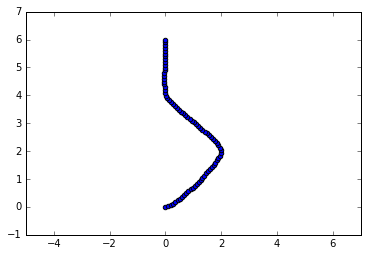

In [12]:
import trajectory
import spline
import imp
imp.reload(trajectory)

points = [[0, 0], [2, 2], [0, 4], [0, 6]]
traj = spline.SplineTrajectory(points, start_dir=[1, 0], end_dir=[0, 1], roundness=0.4)
resolution = 0.1
sampled_traj = traj.get_sample_points(resolution)
positions = [point.position for point in sampled_traj]
scatter(*zip(*positions))
axis('equal')

tp = trajectory.compute_trajectory(traj, actuator_limits, resolution, 0.05, 0, 0, v_limit=4)

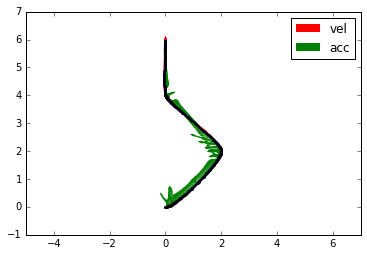

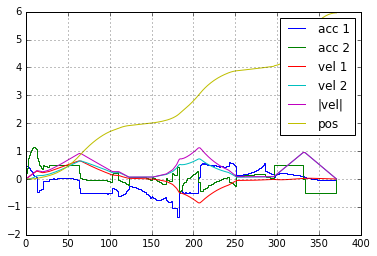

In [13]:
#quiver plot
figure()
dyn_pts = list(zip(*tp))
pos_t = list(zip(*dyn_pts[0]))
vel_t = list(zip(*dyn_pts[1]))
acc_t = list(zip(*dyn_pts[2]))

quiver(pos_t[0], pos_t[1], np.array(vel_t[0]), np.array(vel_t[1]), width=0.0022, pivot='tail', color='r')
quiver(pos_t[0], pos_t[1], np.array(acc_t[0]), np.array(acc_t[1]), width=0.0022, pivot='tail', color='g')
scatter(*pos_t, s=3)

axis('equal')
legend(['vel', 'acc'])

figure()
step(range(len(acc_t[0])), acc_t[0][:])
step(range(len(acc_t[1])), acc_t[1][:])
plot(vel_t[0])
plot(vel_t[1])
plot([np.linalg.norm(i) for i in zip(*vel_t)])
plot(pos_t[1][:])
legend(['acc 1', 'acc 2', 'vel 1', 'vel 2', '|vel|', 'pos'])
grid()
show()